## TASK 1: Exploratory Data Analysis (EDA) and Business Insights

1.  Perform EDA on the provided dataset.
2.  Derive at least 5 business insights from the EDA. Write these insights in short point-wise sentences (maximum 100 words per insight).

Deliverables:
- A Jupyter Notebook/Python script containing your EDA code.
- A PDF report with business insights (maximum 500 words).

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
df_customers = pd.read_csv("Customers.csv")
df_products = pd.read_csv("Products.csv")
df_txns = pd.read_csv("Transactions.csv")

df_merged = pd.merge(df_txns, df_products, how = "left", on = ["ProductID","Price"])
df_merged = pd.merge(df_merged, df_customers, how = "left", on = "CustomerID")

Trend 1: Analyzing the best selling products by count and total sale value.

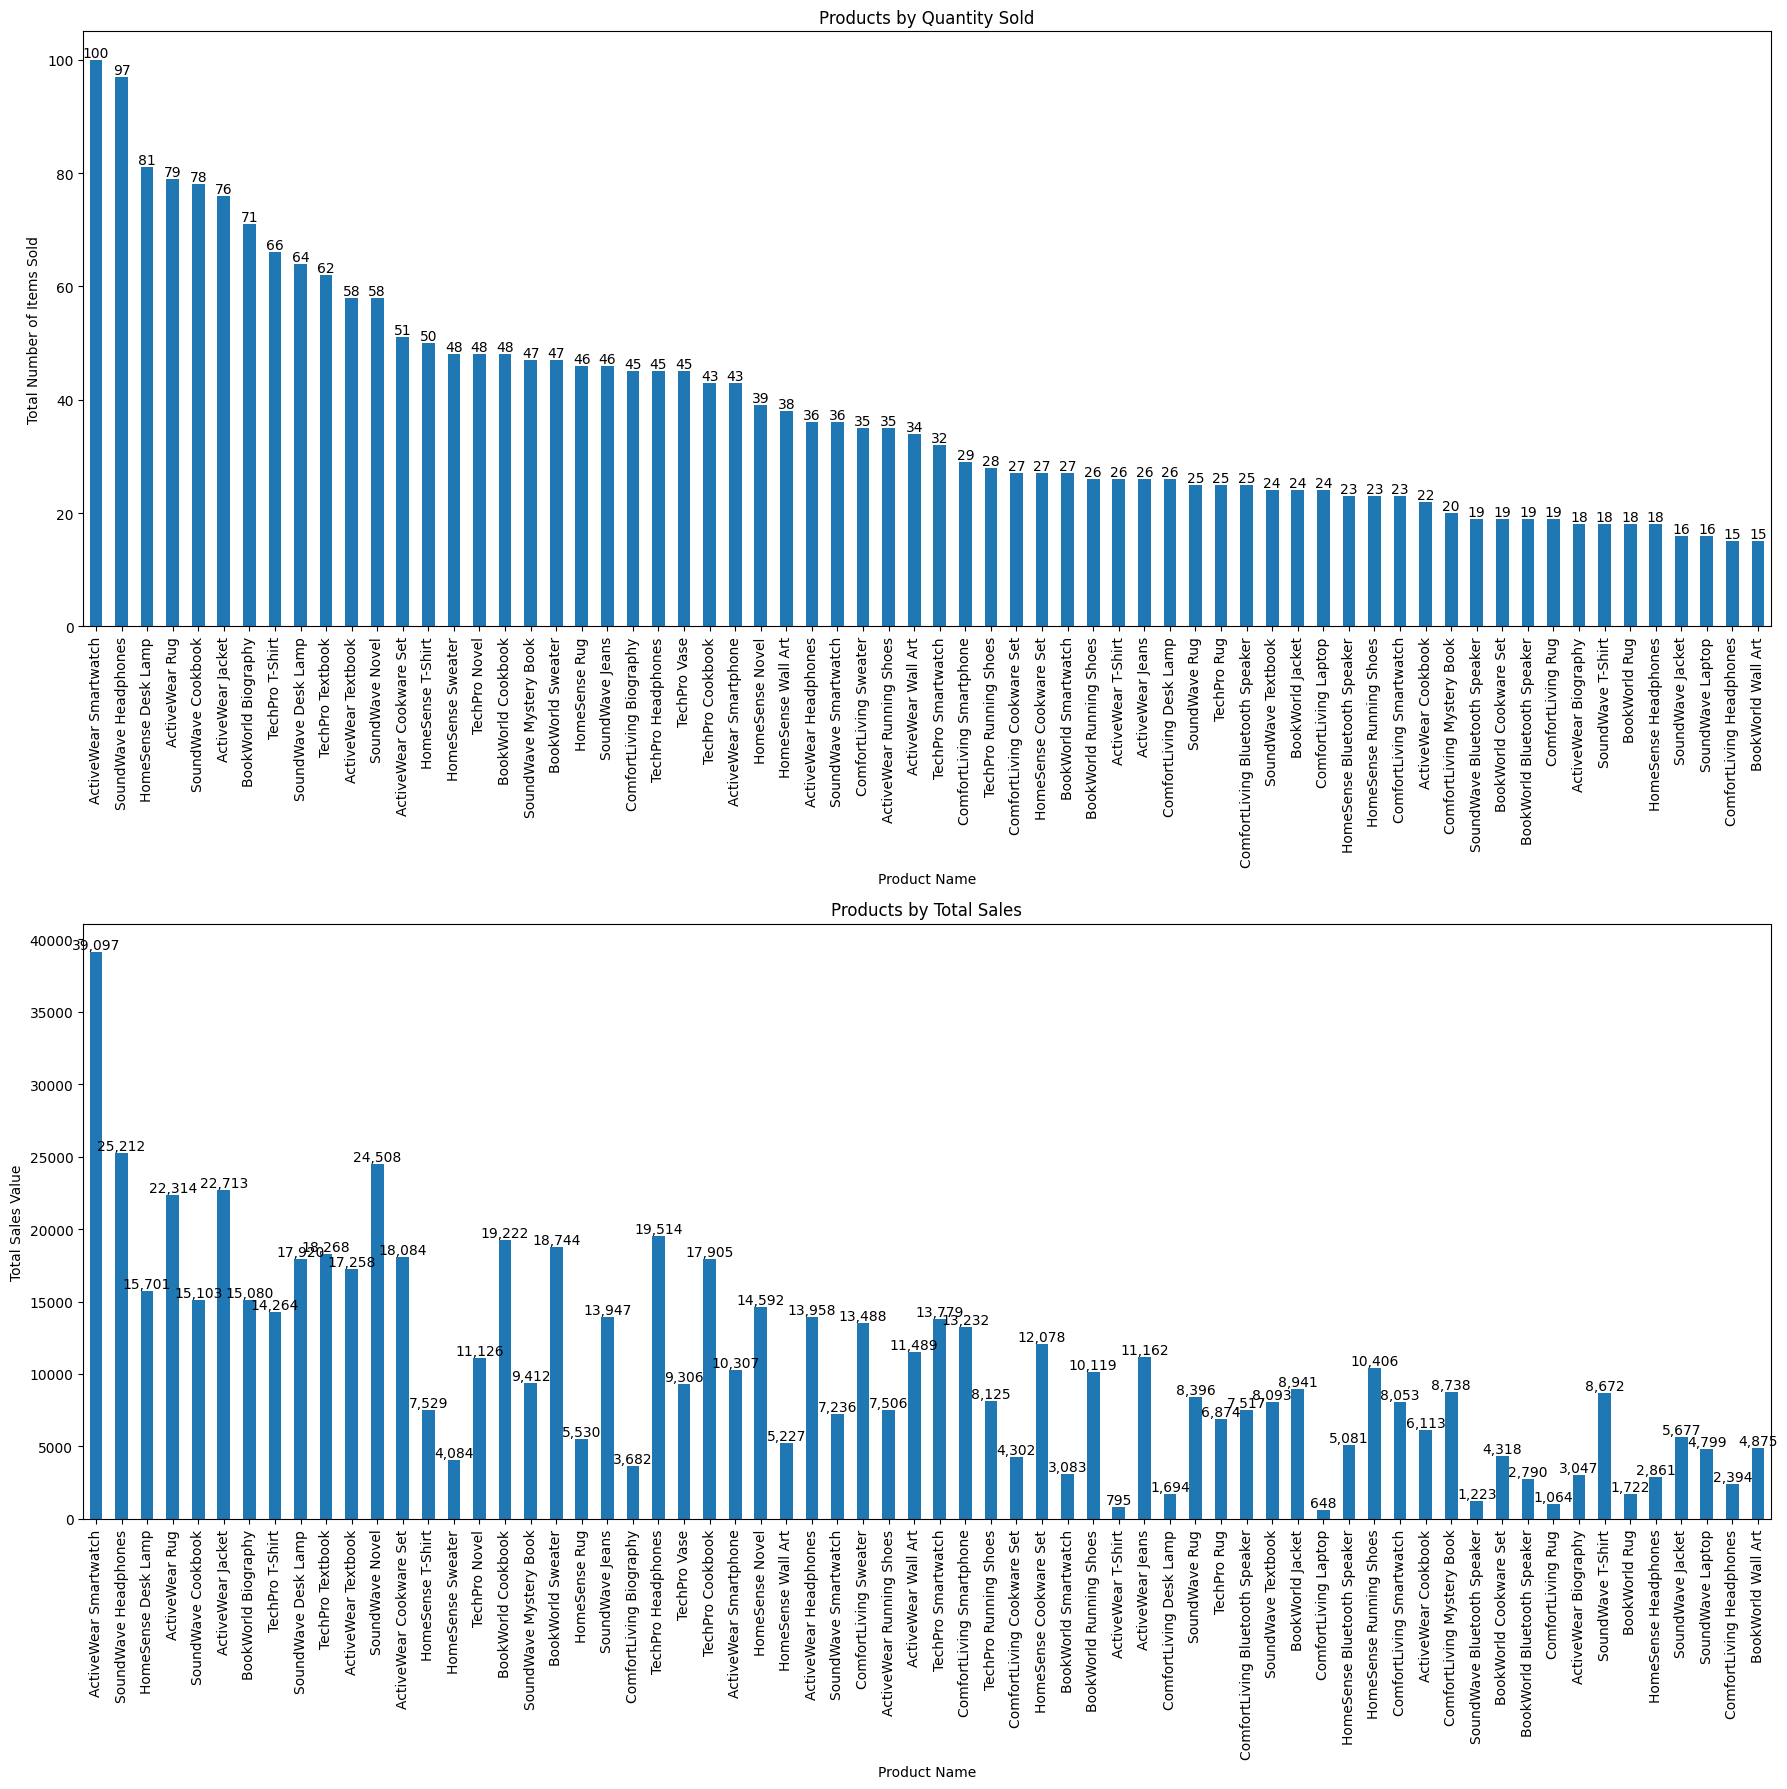

In [36]:
best_products = df_merged.groupby(by="ProductName").agg(
    total_quantity=('Quantity', 'sum'),
    total_sales=('TotalValue', 'sum')
).sort_values(by="total_quantity", ascending=False)

fig, axes = plt.subplots(2, 1, figsize=(18, 18))

best_products['total_quantity'].plot(kind='bar', ax=axes[0], title='Products by Quantity Sold')
axes[0].set_xlabel('Product Name')
axes[0].set_ylabel('Total Number of Items Sold')

best_products['total_sales'].plot(kind='bar', ax=axes[1], title='Products by Total Sales')
axes[1].set_xlabel('Product Name')
axes[1].set_ylabel('Total Sales Value')

for axis_indiv, column in zip(axes,['total_quantity', 'total_sales']):
    for i, v in enumerate(axis_indiv.patches):
        axis_indiv.text(
            v.get_x() + (v.get_width()/2), v.get_height(), 
            f'{v.get_height():,.0f}', 
            ha='center', 
            va='bottom', 
            fontsize=10
        )
        
plt.tight_layout()
plt.show()

Trend 2: Analyzing the top selling category

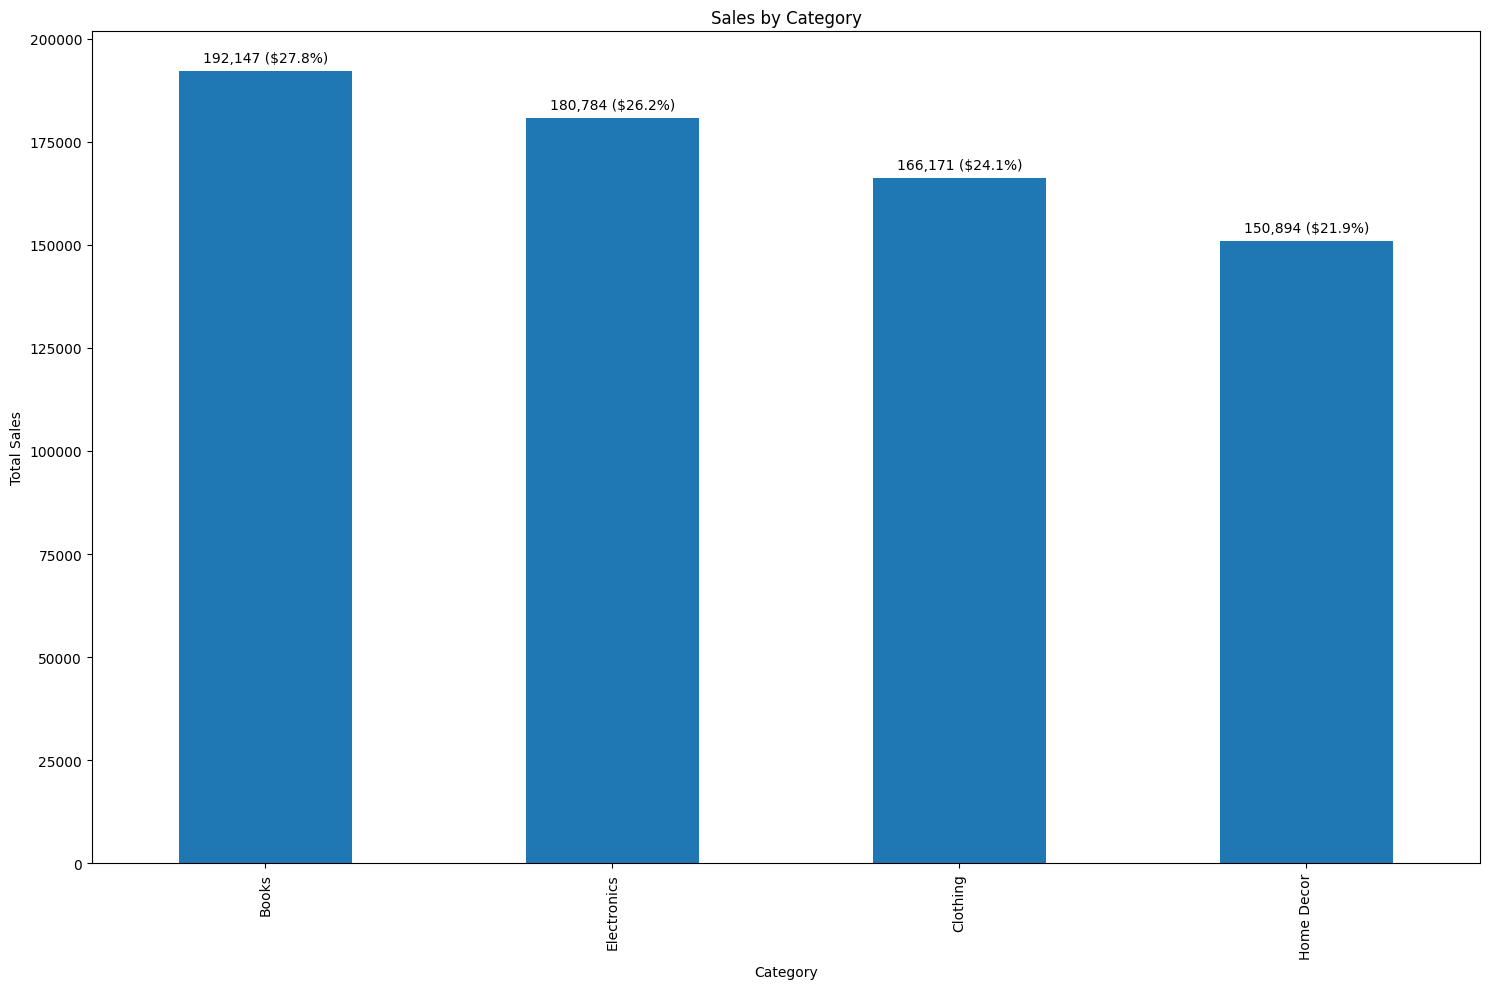

In [44]:
top_category_sales = df_merged.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(15, 10))
top_category_sales.plot(kind='bar', ax=ax, title='Category by Sales')

total_sales = top_category_sales.sum()
for i, v in enumerate(top_category_sales):
    percentage = (v/total_sales) * 100
    ax.text(
        i, v+0.002 * total_sales, 
        f'{v:,.0f} (${percentage:.1f}%)', 
        ha='center', 
        va='bottom', 
        fontsize=10
    )

ax.set_xlabel('Category')
ax.set_ylabel('Total Sales')
plt.title('Sales by Category')
plt.tight_layout()
plt.show()


Trend 3: Analyzing the trend of transactions and sign-up dates based on months

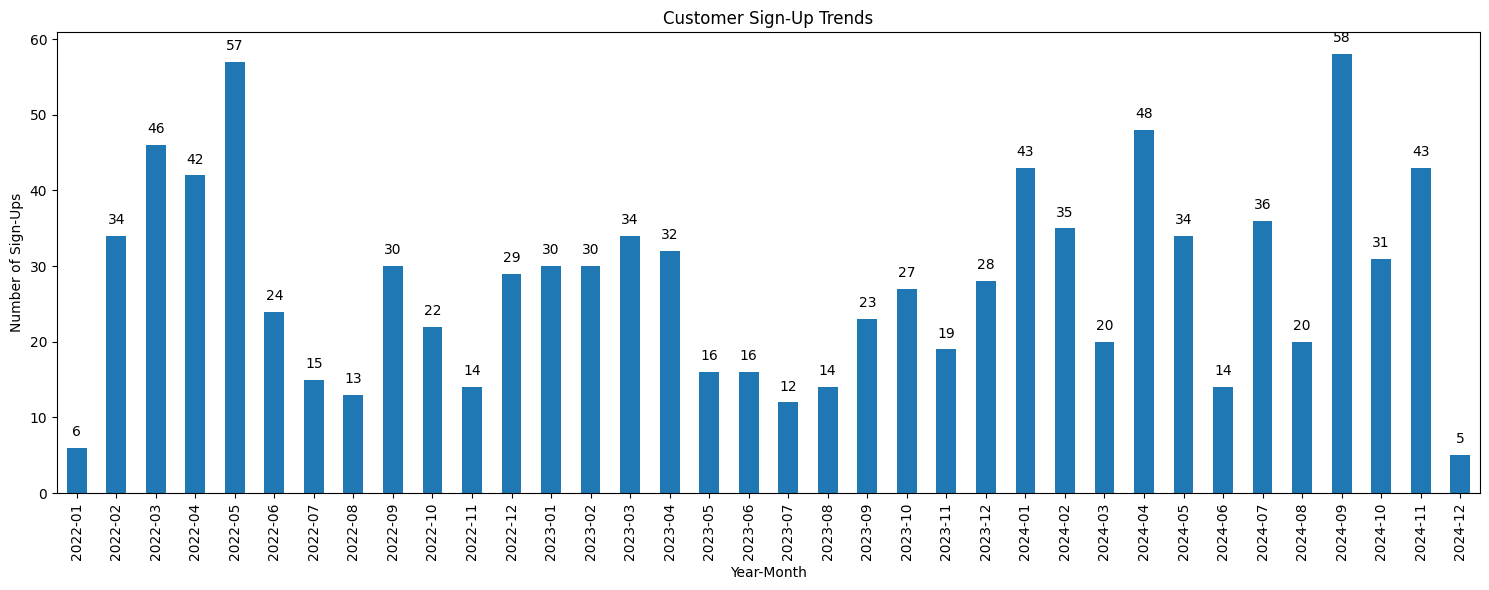

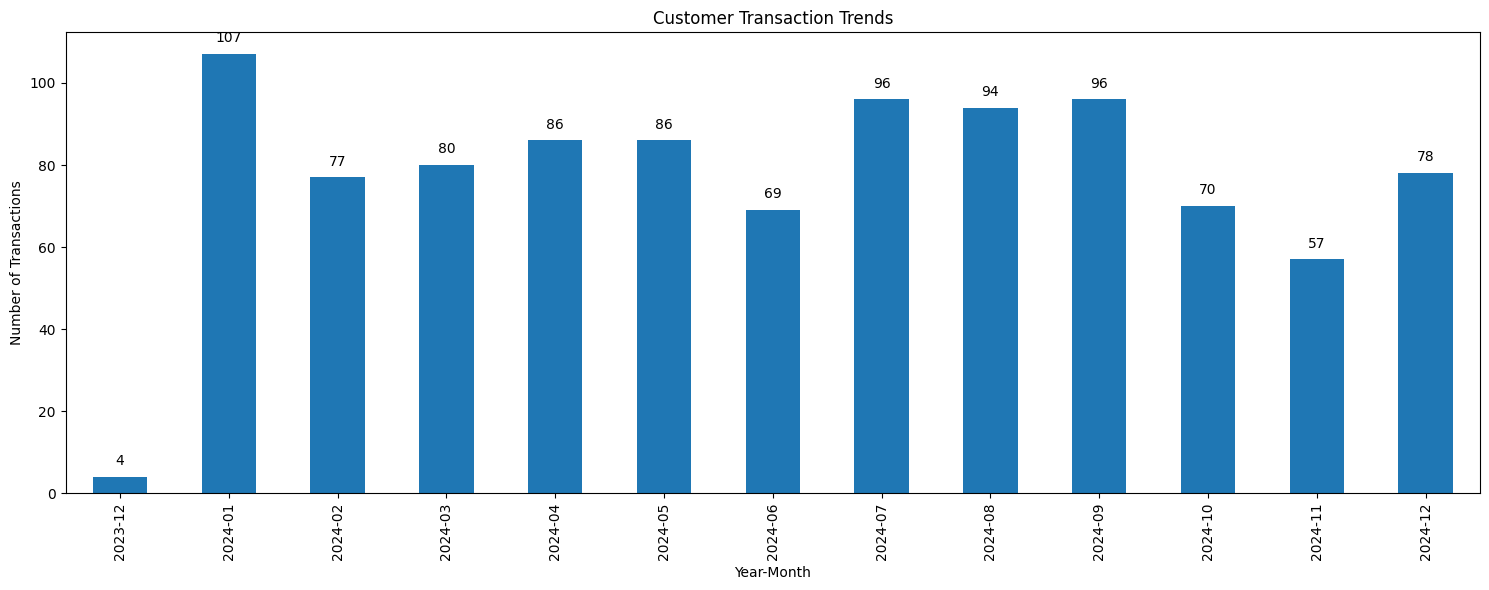

In [47]:
df_merged['SignupDate'] = pd.to_datetime(df_merged['SignupDate'])
df_merged['TransactionDate'] = pd.to_datetime(df_merged['TransactionDate'])

signup_trends = df_merged['SignupDate'].dt.to_period('M').value_counts().sort_index()
txn_trends = df_merged['TransactionDate'].dt.to_period('M').value_counts().sort_index()

fig, ax = plt.subplots(figsize=(15, 6))
signup_trends.plot(kind='bar', ax=ax, title='Customer Sign-Up Trends')

for i, v in enumerate(signup_trends):
    ax.text(
        i, v + 0.02 * max(signup_trends), 
        f'{v}', 
        ha='center', 
        va='bottom', 
        fontsize=10
    )

ax.set_xlabel('Year-Month')
ax.set_ylabel('Number of Sign-Ups')
plt.title('Customer Sign-Up Trends')
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(15, 6))
txn_trends.plot(kind='bar', ax=ax, title='Customer Transaction Trends')

for i, v in enumerate(txn_trends):
    ax.text(
        i, v + 0.02 * max(txn_trends), 
        f'{v}', 
        ha='center', 
        va='bottom', 
        fontsize=10
    )

ax.set_xlabel('Year-Month')
ax.set_ylabel('Number of Transactions')
plt.title('Customer Transaction Trends')
plt.tight_layout()
plt.show()


Trend 4: Analyzing the top customers based on total transaction value

CustomerName
Paul Parsons            10673.87
Bruce Rhodes             8040.39
Gerald Hines             7663.70
William Adams            7634.45
Aimee Taylor             7572.91
Anna Ball                7111.32
Mrs. Kimberly Wright     7073.28
Jennifer Pena            6819.57
Rodney Eaton             6715.72
Juan Mcdaniel            6708.10
Name: TotalValue, dtype: float64


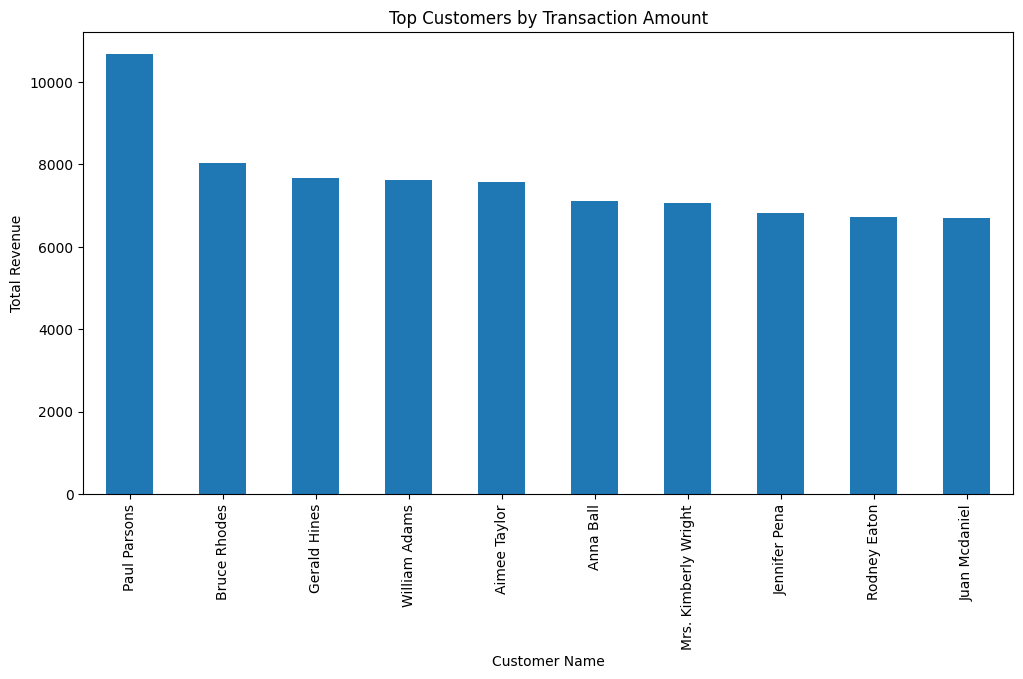

In [48]:
top_customers = df_merged.groupby('CustomerName')['TotalValue'].sum().sort_values(ascending=False).head(10)
print(top_customers)

top_customers.plot(kind='bar', figsize=(12, 6), title='Top Customers by Transaction Amount')
plt.xlabel('Customer Name')
plt.ylabel('Total Revenue')
plt.show()

Trend 5: Analyzing what products are sold together

ProductName               ProductName                
ActiveWear Running Shoes  SoundWave Jacket               0.390533
BookWorld Rug             SoundWave Bluetooth Speaker    0.358143
ComfortLiving Desk Lamp   SoundWave Textbook             0.346991
HomeSense Headphones      ActiveWear Headphones          0.306251
SoundWave Cookbook        ActiveWear Running Shoes       0.300648
dtype: float64


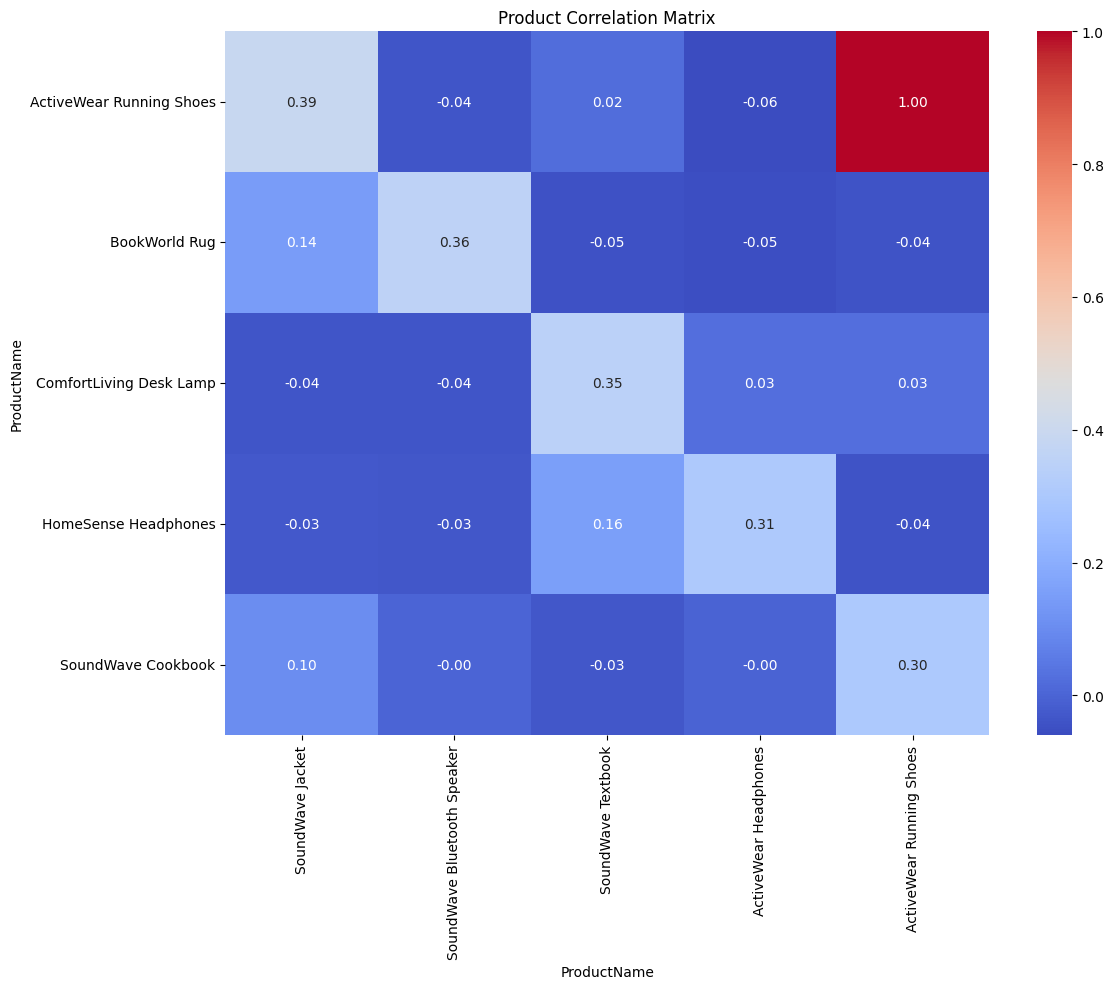

In [56]:
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram

product_pairs = df_merged.groupby(['CustomerID', 'ProductName']).size().unstack(fill_value=0)
product_corr = product_pairs.corr()

corr_linkage = linkage(product_corr, method='average')
threshold = 0.3 # To avoid too many products and have a clear visualization
top_correlations = product_corr.unstack().sort_values(ascending=False)
top_correlations = top_correlations[top_correlations < 1].drop_duplicates().loc[top_correlations > threshold]
print(top_correlations)

filtered_corr_matrix = product_corr.loc[top_correlations.index.get_level_values(0), top_correlations.index.get_level_values(1)]
plt.figure(figsize=(12, 10))
sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Product Correlation Matrix')
plt.tight_layout()
plt.show()
